# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

Also note that all of these questions can be answered with one line of code.
____
** Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
#sal = pd.read_csv('./Salaries.csv')
ecom = pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/EcommercePurchases.csv')

**Check the head of the DataFrame.**

In [5]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


** How many rows and columns are there? **

In [6]:
ecom.shape

(10000, 14)

** What is the average Purchase Price? **

In [7]:
ecom['Purchase Price'].mean()

50.34730200000025

** What were the highest and lowest purchase prices? **

In [8]:
ecom['Purchase Price'].max()

99.99

In [12]:
ecom['Purchase Price'].min()

0.0

** How many people have English 'en' as their Language of choice on the website? **

In [11]:
ecom[ecom['Language'] == 'en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

** How many people have the job title of "Lawyer" ? **


In [12]:
ecom[ecom['Job'] == 'Lawyer'].count()

Address             30
Lot                 30
AM or PM            30
Browser Info        30
Company             30
Credit Card         30
CC Exp Date         30
CC Security Code    30
CC Provider         30
Email               30
Job                 30
IP Address          30
Language            30
Purchase Price      30
dtype: int64

** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [13]:
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

** What are the 5 most common Job Titles? **

In [14]:
ecom['Job'].value_counts().head(5)

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [15]:
ecom[ecom['Lot'] == '90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [16]:
ecom[ecom['Credit Card'] == 4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [17]:
ecom[(ecom['CC Provider'] == 'American Express') & (ecom['Purchase Price'] > 95)].count()

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

** Hard: How many people have a credit card that expires in 2025? **

In [18]:
ecom[ecom["CC Exp Date"].apply(lambda x: x[3:]=='25')].count()

Address             1033
Lot                 1033
AM or PM            1033
Browser Info        1033
Company             1033
Credit Card         1033
CC Exp Date         1033
CC Security Code    1033
CC Provider         1033
Email               1033
Job                 1033
IP Address          1033
Language            1033
Purchase Price      1033
dtype: int64

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [20]:
ecom["Email"].str.split('@').str[1].value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

### Data Visualization

** Implement a bar plot for top 5 most popular email providers/hosts **

In [50]:
top_5 = ecom["Email"].str.split('@').str[1].value_counts().head(5)
top_5

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

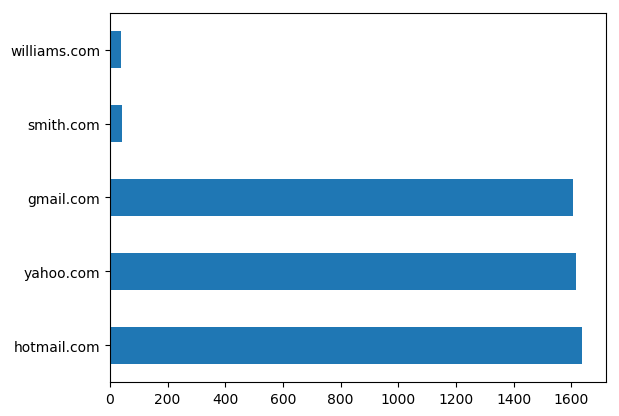

In [48]:
top_5.plot(kind='barh')

** Plot distribution of Purchase Price **

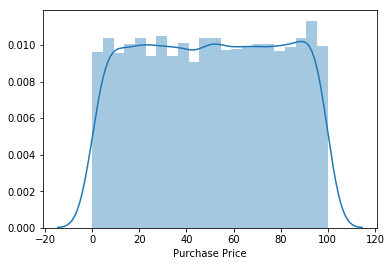

In [63]:
sns.distplot(ecom['Purchase Price'])

** Implement countplot on Language **

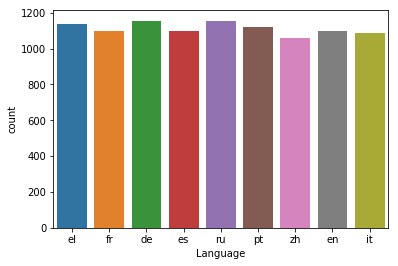

In [28]:
sns.countplot(data = ecom, x='Language');

# Great Job!